<a href="https://colab.research.google.com/github/YoonSa8/alx-pre_course/blob/master/PredictingHousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib as mpl
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
from scipy.io import loadmat
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('/content/drive/MyDrive/HouseSale/train.csv' , header= 0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.rename({'SalePrice': 'y'}, axis = 'columns', inplace= True)
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,y
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
y                  int64
Length: 81, dtype: object

In [7]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
mean=df["LotFrontage"].mean()
df["LotFrontage"].fillna(mean,inplace=True)
mean1=df['MasVnrArea'].mean()
df['MasVnrArea'].fillna(mean,inplace=True)
df.drop('BsmtFinType1', axis=1, inplace=True)
df.drop('BsmtExposure', axis=1, inplace=True)
df.drop('BsmtCond', axis=1, inplace=True)
df.drop('BsmtQual', axis=1, inplace=True)
df.drop('MasVnrType', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('FireplaceQu', axis=1, inplace=True)
df.drop('Alley', axis=1, inplace=True)
df.drop('GarageCond', axis=1, inplace=True)
df.drop('GarageQual', axis=1, inplace=True)
df.drop('GarageType', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True)
df.drop('GarageFinish', axis=1, inplace=True)
df.drop('BsmtFinType2', axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [9]:
df.head


<bound method NDFrame.head of       MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotCon

In [10]:
df.select_dtypes(include=['object']).head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [11]:
df.select_dtypes(include=['int64','float64']).head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,y
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

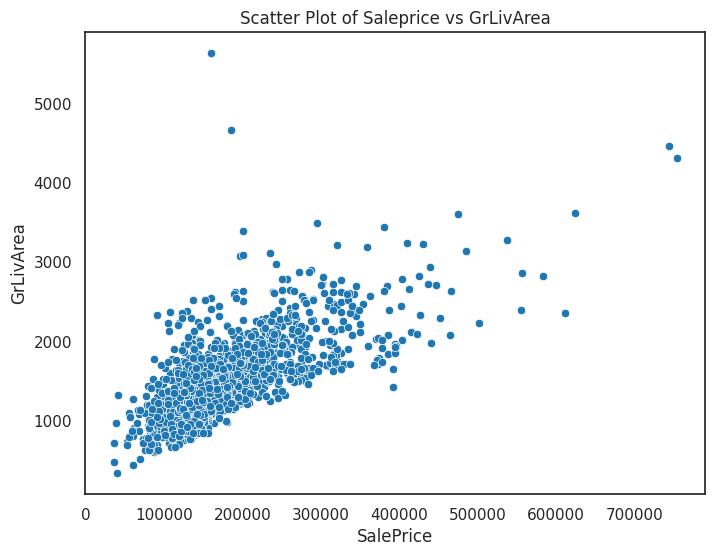

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'y', y='GrLivArea')
plt.title(f'Scatter Plot of Saleprice vs GrLivArea')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.show()

In [14]:
df_train= df.select_dtypes(include=['int64','float64'])
df_labels = df_train['y']
df_labels.head

<bound method NDFrame.head of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: y, Length: 1460, dtype: int64>

In [15]:
X = df_train.drop('y', axis=1).copy()
X.head()
X.shape

(1460, 35)

In [16]:
x_test = pd.read_csv('/content/drive/MyDrive/HouseSale/test.csv' , header= 0)

In [17]:
x_test.shape
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [18]:
mean=x_test["LotFrontage"].mean()
x_test["LotFrontage"].fillna(mean,inplace=True)
mean1=x_test['MasVnrArea'].mean()
x_test['MasVnrArea'].fillna(mean,inplace=True)
x_test.drop('BsmtFinType1', axis=1, inplace=True)
x_test.drop('BsmtExposure', axis=1, inplace=True)
x_test.drop('BsmtCond', axis=1, inplace=True)
x_test.drop('BsmtQual', axis=1, inplace=True)
x_test.drop('MasVnrType', axis=1, inplace=True)
x_test.drop('Id', axis=1, inplace=True)
x_test.drop('MiscFeature', axis=1, inplace=True)
x_test.drop('Fence', axis=1, inplace=True)
x_test.drop('PoolQC', axis=1, inplace=True)
x_test.drop('FireplaceQu', axis=1, inplace=True)
x_test.drop('Alley', axis=1, inplace=True)
x_test.drop('GarageCond', axis=1, inplace=True)
x_test.drop('GarageQual', axis=1, inplace=True)
x_test.drop('GarageType', axis=1, inplace=True)
x_test.drop('GarageYrBlt', axis=1, inplace=True)
x_test.drop('GarageFinish', axis=1, inplace=True)
x_test.drop('BsmtFinType2', axis=1, inplace=True)
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [19]:
x_test.select_dtypes(include=['int64','float64']).head()
df_test= x_test.select_dtypes(include=['int64','float64'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [20]:
mean=df_test["BsmtFinSF1"].mean()
df_test["BsmtFinSF1"].fillna(mean,inplace=True)
mean=df_test["BsmtFinSF2"].mean()
df_test["BsmtFinSF2"].fillna(mean,inplace=True)
mean=df_test["GarageArea"].mean()
df_test["GarageArea"].fillna(mean,inplace=True)
mean=df_test["GarageCars"].mean()
df_test["GarageCars"].fillna(mean,inplace=True)
mean=df_test["BsmtHalfBath"].mean()
df_test["BsmtHalfBath"].fillna(mean,inplace=True)
mean=df_test["BsmtFullBath"].mean()
df_test["BsmtFullBath"].fillna(mean,inplace=True)
mean=df_test["TotalBsmtSF"].mean()
df_test["TotalBsmtSF"].fillna(mean,inplace=True)
mean=df_test["BsmtUnfSF"].mean()
df_test["BsmtUnfSF"].fillna(mean,inplace=True)

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotFrontage    1459 non-null   float64
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1459 non-null   float64
 8   BsmtFinSF1     1459 non-null   float64
 9   BsmtFinSF2     1459 non-null   float64
 10  BsmtUnfSF      1459 non-null   float64
 11  TotalBsmtSF    1459 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1459 non-null   float64
 17  BsmtHalfBath   1459 non-null   float64
 18  FullBath

In [21]:
y_test= pd.read_csv('/content/drive/MyDrive/HouseSale/sample_submission.csv' , header= 0)
y_test.info


<bound method DataFrame.info of         Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]>

In [22]:
y_test.drop('Id', axis=1, inplace=True)

In [23]:
#linear regression
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
Model.fit(X,df_labels)


LinearRegression()

In [24]:
y_pred=Model.predict(df_test)
y_pred

array([118751.51931958, 152780.93376181, 172407.05438658, ...,
       172273.57739287, 102084.58695774, 252713.61028788])

In [25]:
from sklearn import metrics

print('Absolute Error:', metrics.mean_absolute_error( y_test, y_pred))
print('Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Absolute Error: 54893.050275511596
Squared Error: 4703595414.64471
Root Mean Squared Error: 68582.76324736931


In [26]:
#random forest regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=300, random_state=0)

regressor.fit(X, df_labels)

RandomForestRegressor(n_estimators=300, random_state=0)

In [28]:
predicted_price = regressor.predict(df_test)

In [29]:
print('Absolute Error:', metrics.mean_absolute_error( y_test, predicted_price))
print('Squared Error:', metrics.mean_squared_error(y_test,predicted_price))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_price)))

Absolute Error: 53725.52432351753
Squared Error: 4937517997.00939
Root Mean Squared Error: 70267.4746736311


In [39]:
#try quantile regression to better accurcy
import lightgbm as ltb

models = {}
df_pred = df_labels.copy()
for alpha in [0.01, 0.5, 0.8]:
  model =ltb.LGBMRegressor(objective = 'quantile', alpha= alpha)
  model.fit(X ,df_labels)
  df_pred[str(alpha)] = model.predict(df_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3070
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 34
[LightGBM] [Info] Start training from score 61829.800781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [41]:
for alpha in [0.01, 0.5, 0.8]:
  statitects = (df_pred[str(alpha)]> y_test['SalePrice']).value_counts(normalize =True)
  truePre, falsePre = statitects[True], statitects[False]
  print(f"""predections for alpha = {alpha} are greater than true values in {truePre*100}% of cases and less or equal in {falsePre*100}% of cases """)

predections for alpha = 0.01 are greater than true values in 1.9191226867717615% of cases and less or equal in 98.08087731322824% of cases 
predections for alpha = 0.5 are greater than true values in 36.874571624400275% of cases and less or equal in 63.125428375599725% of cases 
predections for alpha = 0.8 are greater than true values in 42.08361891706648% of cases and less or equal in 57.91638108293352% of cases 


In [42]:
#the best result was at alpha equal 0.01